In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import glob
import os
import string

%run -i "C:/crs/src/NOPP_comparison/storm_coords.py"
%run -i "C:/crs/src/NOPP_comparison/scat_stats.py"

In [2]:
# Define some colors
noaa_blue = '#1D70B7'
usgs_green = '#2E8B57'
# delft_blue = '#006699' # not very close
delft_blue = '#0D38E0' #from Ap...still not right
UF_orange = '#FA4616'
UF_blue = '#0021A5'

alphabet = list(string.ascii_lowercase)

def is_odd(n):
    return n % 2 != 0

In [3]:
# Target date
#TODO - Is this good?
start_date = np.datetime64('2024-09-25 00:00:00')
end_date = np.datetime64('2024-09-28 00:00:00')

home_dir = 'C:/crs/proj/2025_NOPP_comparison/'
wl_obs_dir = home_dir+'helene_water_level/'
fig_dir = home_dir+'helene_figs/'

wl_file_list = glob.glob(wl_obs_dir + '*.nc')
wl_sta_list = []
for item in wl_file_list:
    wl_sta_list.append( os.path.splitext(os.path.basename(item))[0][0:10])
print(wl_sta_list)
print("No. wl_sta_list:",len(wl_sta_list))  

['FLBAY30540', 'FLCIT35742', 'FLDIX25020', 'FLFRA26262', 'FLHER35741', 'FLLEV35745', 'FLPAS35743', 'FLPIN26405', 'FLPIN31148', 'FLSAR25010', 'FLSAR26282', 'FLTAY35738', 'FLTAY35739', 'FLWAK29937']
No. wl_sta_list: 14


In [4]:
# grab the lat/lon, pre-post sensor elevation, pre- post-land elevation
# add them to list of list
obs_sta_info_list = []
for sta in wl_sta_list:
    obs_url = wl_obs_dir+sta+'_2024_Helene_Butterworth_stormtide_unfiltered.nc'
    obs_ds = xr.open_dataset( obs_url )
    first_time = obs_ds['time'][0].values
    last_time = obs_ds['time'][-1].values
    lat = obs_ds['latitude'].values
    lon = obs_ds['longitude'].values
    sensor_el_start = obs_ds.attrs['sensor_orifice_elevation_at_deployment_time']
    sensor_el_end = obs_ds.attrs['sensor_orifice_elevation_at_retrieval_time']
    sensor_el_diff = sensor_el_end -sensor_el_start
    el_start = obs_ds.attrs['initial_land_surface_elevation']
    el_end = obs_ds.attrs['final_land_surface_elevation']
    el_diff = el_end - el_start
    llist = [sta, first_time, last_time, lat, lon, sensor_el_start, sensor_el_end, el_start, el_end]
    obs_sta_info_list.append(llist)
    print(sta, first_time, last_time)
    print(lat, lon)
    print(sensor_el_start, sensor_el_end, sensor_el_diff)
    print(el_start, el_end, el_diff)

FLBAY30540 2024-09-26T01:00:00.000000000 2024-09-27T17:59:59.750000128
30.189342498779297 -85.83186340332031
0.8809 0.8687 -0.012199999999999989
0.3505 0.8687 0.5182
FLCIT35742 2024-09-26T12:30:00.000000000 2024-09-27T18:59:59.750000128
28.909500122070312 -82.69300079345703
0.6767 0.6645 -0.012199999999999989
0.8352 0.6645 -0.17070000000000007
FLDIX25020 2024-09-26T00:00:00.000000000 2024-10-01T23:59:29.750000128
29.393659591674805 -83.20321655273438
0.4938 0.4938 0.0
0.0183 0.4938 0.47550000000000003
FLFRA26262 2024-09-26T12:00:00.000000000 2024-09-27T23:59:29.750000128
29.893970489501953 -84.38123321533203
3.2766 3.2918 0.015199999999999658
3.1181 3.2918 0.17369999999999974
FLHER35741 2024-09-26T04:00:00.000000000 2024-09-28T19:09:59.750000128
28.56839942932129 -82.65709686279297
0.4511 0.4298 -0.021299999999999986
0.1128 0.4298 0.317
FLLEV35745 2024-09-26T00:00:00.000000000 2024-10-01T23:59:29.750000128
29.135908126831055 -83.0291519165039
0.0396 0.0396 0.0
-1.1003 0.0396 1.13990000

In [5]:
obs_sta_info_list

[['FLBAY30540',
  np.datetime64('2024-09-26T01:00:00.000000000'),
  np.datetime64('2024-09-27T17:59:59.750000128'),
  array(30.1893425),
  array(-85.8318634),
  np.float64(0.8809),
  np.float64(0.8687),
  np.float64(0.3505),
  np.float64(0.8687)],
 ['FLCIT35742',
  np.datetime64('2024-09-26T12:30:00.000000000'),
  np.datetime64('2024-09-27T18:59:59.750000128'),
  array(28.90950012),
  array(-82.69300079),
  np.float64(0.6767),
  np.float64(0.6645),
  np.float64(0.8352),
  np.float64(0.6645)],
 ['FLDIX25020',
  np.datetime64('2024-09-26T00:00:00.000000000'),
  np.datetime64('2024-10-01T23:59:29.750000128'),
  array(29.39365959),
  array(-83.20321655),
  np.float64(0.4938),
  np.float64(0.4938),
  np.float64(0.0183),
  np.float64(0.4938)],
 ['FLFRA26262',
  np.datetime64('2024-09-26T12:00:00.000000000'),
  np.datetime64('2024-09-27T23:59:29.750000128'),
  array(29.89397049),
  array(-84.38123322),
  np.float64(3.2766),
  np.float64(3.2918),
  np.float64(3.1181),
  np.float64(3.2918)],
 [

In [6]:
# Inventory Deltares files
deltares_file_list = glob.glob(home_dir+'helene_deltares_model_comparison/'+'F*.csv')
deltares_sta_list = []
for item in deltares_file_list:
    deltares_sta_list.append( os.path.splitext(os.path.basename(item))[0] )
    
print(deltares_sta_list)
print("No. Deltares_sta_list:",len(deltares_sta_list))  

# Find matching statsion
matches = list(set(wl_sta_list) & set(deltares_sta_list))
print("No. matches:",len(matches))
print(matches)

['FLBAY03331', 'FLBAY30540', 'FLBAY35744', 'FLCIT35742', 'FLDIX25020', 'FLFRA26262', 'FLFRA29933', 'FLGUL26254', 'FLHER35741', 'FLLEE20980', 'FLLEV27481', 'FLLEV35745', 'FLPAS35743', 'FLPIN26405', 'FLPIN31148', 'FLPIN33472', 'FLPIN35746', 'FLSAR25010', 'FLSAR26282', 'FLTAY03355', 'FLTAY35738', 'FLTAY35739', 'FLWAK29937']
No. Deltares_sta_list: 23
No. matches: 14
['FLBAY30540', 'FLPIN31148', 'FLTAY35739', 'FLHER35741', 'FLPIN26405', 'FLWAK29937', 'FLLEV35745', 'FLFRA26262', 'FLTAY35738', 'FLSAR26282', 'FLCIT35742', 'FLDIX25020', 'FLPAS35743', 'FLSAR25010']


In [7]:
# Maitane model results
#url='http://geoport.whoi.edu/thredds/dodsC/vortexfs1/usgs/Projects/dorian/dorian_coupled11/PAM/dorian_his.ncml'
url ='http://icoast.rc.ufl.edu/thredds/dodsC/Noppcoawsthindcast/Helene/ocean_his.nc'
dsm = xr.open_dataset(url)
latm = dsm.lat_rho.values
lonm = dsm.lon_rho.values
time_all = dsm.ocean_time.values
idxms = int( np.where(time_all >= start_date)[0][0] )
idxme = int( np.where(time_all <= end_date)[0][-1] )
timem = time_all[idxms:idxme]
mask_rho = dsm.mask_rho.values
# TODO - change the time of the wet-dry mast
#wd_mask_rho = dsm.wetdry_mask_rho[19,:,:].values
wd_mask_rho = dsm.mask_rho[:,:].values

# Find closest model grid point
# Calculate the difference between the model grid points and the buoy locations; find model indices to closest points
model_shape = np.shape( lonm )
print('model shape: ',model_shape)
print('nlat, nlon: ',np.shape(mask_rho))

# UF time list and UF wl list
UF_time = []
UF_wl = []

# loop through observations and get lat/lon
for olist in obs_sta_info_list:
    lato = olist[3]
    lono = olist[4]
    sensor_elev = olist[5]
    print(lato,lono)
    # Find the indices of the nearest lat/lon
    dist = haversine( (lonm*wd_mask_rho), (latm*wd_mask_rho) , lono, lato )
    ilatm, ilonm = np.argwhere( dist == np.min(dist) ).squeeze()  
    print('ilatm, ilonm:', ilatm, ilonm )
    timem = time_all[idxms:idxme]
    # Get the water depth
    hm  = dsm.h[ilatm, ilonm].values
    print('elev',sensor_elev,', model depth: ',hm,' distance apart:',dist[ilatm,ilonm])
    # Get time and wl data
    # Get model data for specified times, lat, and lons
    wl = dsm.zeta[idxms:idxme, ilatm, ilonm].values
    UF_time.append(timem)
    UF_wl.append(wl)


model shape:  (545, 690)
nlat, nlon:  (545, 690)
30.189342498779297 -85.83186340332031
ilatm, ilonm: 469 223
elev 0.8809 , model depth:  16.09163153207453  distance apart: 0.7697182942249258
28.909500122070312 -82.69300079345703
ilatm, ilonm: 341 352
elev 0.6767 , model depth:  2.629233637824239  distance apart: 0.8370673198924116
29.393659591674805 -83.20321655273438
ilatm, ilonm: 377 335
elev 0.4938 , model depth:  2.415347111085315  distance apart: 1.7342368954211818
29.893970489501953 -84.38123321533203
ilatm, ilonm: 425 288
elev 3.2766 , model depth:  12.823644267525522  distance apart: 1.2536084875320004
28.56839942932129 -82.65709686279297
ilatm, ilonm: 323 347
elev 0.4511 , model depth:  6.165066533914322  distance apart: 1.3808487557947098
29.135908126831055 -83.0291519165039
ilatm, ilonm: 360 340
elev 0.0396 , model depth:  4.080785655077999  distance apart: 0.6741745247109286
28.28510093688965 -82.73249816894531
ilatm, ilonm: 310 339
elev 0.0914 , model depth:  2.72236266947

### Set up plot

0 FLBAY30540
1 FLPIN31148
2 FLTAY35739
3 FLHER35741
4 FLPIN26405
5 FLWAK29937
6 FLLEV35745
7 FLFRA26262
8 FLTAY35738
9 FLSAR26282
10 FLCIT35742
11 FLDIX25020
12 FLPAS35743


C:\Users\csherwood\AppData\Local\Temp\3\ipykernel_30400\3174717378.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axf[i].set_xticklabels(x_labels, rotation=45, ha="right")


13 FLSAR25010


C:\Users\csherwood\AppData\Local\Temp\3\ipykernel_30400\3174717378.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axf[i].set_xticklabels(x_labels, rotation=45, ha="right")


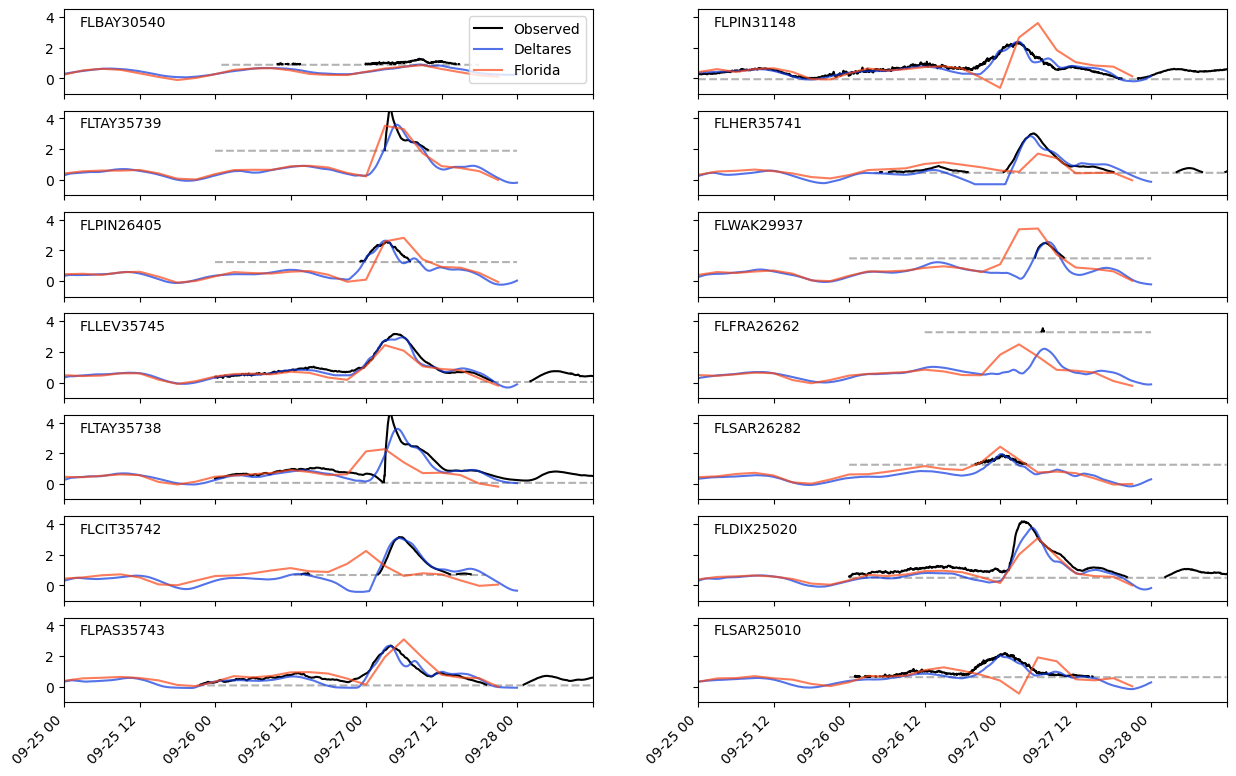

In [8]:
# Create an array with 12-hour increments
x_ticks = np.arange(start_date, end_date+np.timedelta64(12, 'h'), np.timedelta64(12, 'h'))
# Format the tick labels (e.g., 'MM-DD HH:MM' format)
x_labels = [pd.Timestamp(x).strftime('%m-%d %H') for x in x_ticks]
start_plot_date = start_date
end_plot_date = end_date+np.timedelta64(12, 'h')


# Set up the plot
fig, ax = plt.subplots( 7, 2, sharex=True, sharey=False, figsize=(15, 9 ) )
axf = ax.flatten()
for i, sta in enumerate( matches ):
    print(i, sta)
    obs_url = wl_obs_dir+sta+'_2024_Helene_Butterworth_stormtide_unfiltered.nc'
    deltares_url =  'C:/crs/proj/2025_NOPP_comparison/helene_deltares_model_comparison/'+sta+'.csv'
    obs_ds = xr.open_dataset( obs_url )
    obs_time = obs_ds['time']
    obs_wl = obs_ds['water_surface_height_above_reference_datum']
    sensor_el_start = obs_ds.attrs['sensor_orifice_elevation_at_deployment_time']
    sensor_el = np.ones_like(obs_wl)*sensor_el_start
    obs_wl[obs_wl<=sensor_el_start+0.05]=obs_wl[obs_wl<=sensor_el_start+0.05]*np.nan
    first_time = obs_time[0].values
    last_time = obs_time[-1].values
    # print('Obs. first and last times: ',first_time, last_time)

    deltares_df = pd.read_csv( deltares_url )
    deltares_df['time']=pd.to_datetime(deltares_df['time'])
    deltares_time = deltares_df['time']
    deltares_wl = deltares_df['mod']
    # print('Deltares first and last times: ',deltares_time.iloc[0], deltares_time.iloc[-1] )
    if i == 0:
        axf[i].plot(obs_time, sensor_el, '--',c='gray', alpha = .6)
        axf[i].plot(obs_time, obs_wl, '-k',label='Observed')
        axf[i].plot(deltares_time, deltares_wl, '-',c=delft_blue,label='Deltares', alpha=.7)
        axf[i].plot(UF_time[i], UF_wl[i], '-',c=UF_orange,label='Florida', alpha=.7)
        axf[i].legend(loc='upper right')
    else:
        axf[i].plot(obs_time, sensor_el, '--',c='gray', alpha = .6)
        axf[i].plot(obs_time, obs_wl, '-k')
        axf[i].plot(deltares_time, deltares_wl, '-',c=delft_blue, alpha=.7)
        axf[i].plot(UF_time[i], UF_wl[i], '-',c=UF_orange, alpha=.7)

    # axf[i].text(.05, .65, txt, fontsize=10, transform=axf[i].transAxes )
    axf[i].set_xlim((start_plot_date, end_plot_date))
    # axf[i].text(.03, .8, alphabet[i]+' '+sta, fontsize=10, transform=axf[i].transAxes )
    axf[i].text(.03, .8, sta, fontsize=10, transform=axf[i].transAxes )

    axf[i].set_ylim((-1,4.5))
    if is_odd(i):
        axf[i].set_yticklabels([])
    if i>=12:
        axf[i].set_xticklabels(x_labels, rotation=45, ha="right")

plt.savefig( fig_dir+'wl_plots.png', dpi=200, bbox_inches='tight')